## 1. Importing the Libraries

In [1]:
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 2. Required Parameters

In [2]:
# Inline Matplotlib
%matplotlib inline
plt.style.use('ggplot')

# Stoping the Warnings
warnings.filterwarnings('ignore')

## 3. Importing the Dataset

In [3]:
filename = glob.iglob('*.csv')
df = pd.read_csv(*filename)

print(f"The Dimension of the Dataset is - {df.shape} ")

The Dimension of the Dataset is - (683, 11) 


In [4]:
df.head(15)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
df.tail(15)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
668,466906,1,1,1,1,2,1,1,1,1,2
669,534555,1,1,1,1,2,1,1,1,1,2
670,536708,1,1,1,1,2,1,1,1,1,2
671,566346,3,1,1,1,2,1,2,3,1,2
672,603148,4,1,1,1,2,1,1,1,1,2
673,654546,1,1,1,1,2,1,1,1,8,2
674,654546,1,1,1,3,2,1,1,1,1,2
675,695091,5,10,10,5,4,5,4,4,1,4
676,714039,3,1,1,1,2,1,1,1,1,2
677,763235,3,1,1,1,2,1,2,1,2,2


## 4. Analyzing the Class

In [6]:
# counting the classes
class_len  = {}
count2 = 0
count4 = 0
count = 0
for i in df['Class']:
    if i == 2:
        count2 += 1
    else:
        count4 += 1
class_len['Benign'] = count2
class_len['Malignant'] = count4
print(class_len)

{'Benign': 444, 'Malignant': 239}


## 5. Seperating the Independent and Dependent Variable

In [7]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [8]:
print(f"The Dimension of Independent Variable is {X.shape}")
print(f"The Dimension of Dependent Variable is {Y.shape}")

The Dimension of Independent Variable is (683, 10)
The Dimension of Dependent Variable is (683,)


In [9]:
X

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]],
      dtype=int64)

In [10]:
Y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## 6. Splitting the Dataset into Training Set and Test Set

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                     Y, 
                                                     test_size=0.25,
                                                     random_state = 79,
                                                     shuffle = True)

In [12]:
print(f"Size of X_train: {X_train.shape}")
print(f"Size of X_test: {X_test.shape}")
print(f"Size of Y_train: {Y_train.shape}")
print(f"Size of Y_test: {Y_test.shape}")

Size of X_train: (512, 10)
Size of X_test: (171, 10)
Size of Y_train: (512,)
Size of Y_test: (171,)


## 7. Scaling the Dataset

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.13729253, -0.15777491, -0.71735878, ..., -0.20307895,
        -0.63699101, -0.35879157],
       [ 0.42431184, -0.15777491,  1.20226333, ...,  2.22438615,
        -0.63699101, -0.35879157],
       [ 0.1631215 ,  1.25324265, -0.39742177, ...,  1.41523112,
        -0.63699101, -0.35879157],
       ...,
       [ 0.10508851, -1.21603808, -0.71735878, ..., -0.60765646,
        -0.63699101, -0.35879157],
       [ 0.23412859, -0.15777491, -0.71735878, ..., -0.20307895,
        -0.63699101, -0.35879157],
       [-0.3348435 ,  1.25324265,  2.16207438, ...,  1.41523112,
         0.00946964,  3.58571449]])

In [15]:
X_test

array([[ 0.32066884,  0.19497948, -0.71735878, ..., -1.01223398,
        -0.63699101, -0.35879157],
       [ 0.43111233,  0.19497948, -0.39742177, ..., -1.01223398,
        -0.63699101, -0.35879157],
       [ 0.35816339, -1.21603808, -0.71735878, ..., -0.20307895,
        -0.63699101, -0.35879157],
       ...,
       [-0.45070804,  0.19497948, -0.71735878, ..., -1.01223398,
        -0.63699101, -0.35879157],
       [ 0.23756751, -0.5105293 , -0.71735878, ..., -0.60765646,
        -0.63699101, -0.35879157],
       [ 0.17708989, -0.5105293 , -0.71735878, ..., -0.20307895,
        -0.63699101, -0.35879157]])

## 8. Training the Models
### 8.1 Logistic Regression

In [16]:
LR_classifier = LogisticRegression(random_state= 42,
                                   n_jobs = -1)
LR_classifier.fit(X_train, Y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [17]:
y_pred = LR_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [18]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[114,   1],
       [  4,  52]], dtype=int64)

In [19]:
lr_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {lr_acc*100:.3f} %")

The Accuracy of the Model is - 97.076 %


In [20]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       115
           4       0.98      0.93      0.95        56

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### 8.2 K Nearest Neighbors

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=10,
                                      n_jobs = -1)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [22]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [23]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[114,   1],
       [  4,  52]], dtype=int64)

In [24]:
knn_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {knn_acc*100:.3f} %")

The Accuracy of the Model is - 97.076 %


In [25]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       115
           4       0.98      0.93      0.95        56

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### 8.3.1 Support Vector Classification - Linear

In [26]:
svcl_classifier = SVC(kernel = 'linear',
                     verbose = True,
                     random_state = 42)
svcl_classifier.fit(X_train, Y_train)

[LibSVM]

SVC(kernel='linear', random_state=42, verbose=True)

In [27]:
y_pred = svcl_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [28]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[114,   1],
       [  3,  53]], dtype=int64)

In [29]:
svcl_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {svcl_acc*100:.3f} %")

The Accuracy of the Model is - 97.661 %


In [30]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       115
           4       0.98      0.95      0.96        56

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### 8.3.2 Support Vector Classification - Kernel

In [31]:
svck_classifier = SVC(kernel = 'rbf',
                     verbose = True,
                     random_state = 42)
svck_classifier.fit(X_train, Y_train)

[LibSVM]

SVC(random_state=42, verbose=True)

In [32]:
y_pred = svck_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [33]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[113,   2],
       [  3,  53]], dtype=int64)

In [34]:
svck_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {svck_acc*100:.3f} %")

The Accuracy of the Model is - 97.076 %


In [35]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.98      0.98       115
           4       0.96      0.95      0.95        56

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### 8.4 Naive Bayes

In [36]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [37]:
y_pred = nb_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [38]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[114,   1],
       [  3,  53]], dtype=int64)

In [39]:
nb_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {nb_acc*100:.3f} %")

The Accuracy of the Model is - 97.661 %


In [40]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       115
           4       0.98      0.95      0.96        56

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### 8.5 Decision Tree Classifier

In [41]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',
                                       random_state = 42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
y_pred = dt_classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [43]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[112,   3],
       [  6,  50]], dtype=int64)

In [44]:
dtc_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {dtc_acc*100:.3f} %")

The Accuracy of the Model is - 94.737 %


In [45]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       115
           4       0.94      0.89      0.92        56

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



### 8.6 Random Forest Classifier

In [46]:
rfc_classifier = RandomForestClassifier(n_estimators=50,
                                        criterion = 'entropy',
                                        n_jobs = -1,
                                        random_state = 42,
                                        verbose = 1)
rfc_classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


RandomForestClassifier(criterion='entropy', n_estimators=50, n_jobs=-1,
                       random_state=42, verbose=1)

In [47]:
y_pred = rfc_classifier.predict(X_test)
y_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [48]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[114,   1],
       [  3,  53]], dtype=int64)

In [49]:
rfc_acc = accuracy_score(Y_test, y_pred)
print(f"The Accuracy of the Model is - {rfc_acc*100:.3f} %")

The Accuracy of the Model is - 97.661 %


In [50]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       115
           4       0.98      0.95      0.96        56

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## 9. Comparing The Results

In [51]:
print('\n                             Accuracy')
print('                            -------------')

print(f"Logistic Regression        : {lr_acc*100:.4f}%")
print(f"KNN Classifier             : {knn_acc * 100:.4f}%")
print(f"Linear SVC                 : {svcl_acc * 100:.4f}%")
print(f"Gaussian Kernel SVC        : {svck_acc * 100:.4f}%")
print(f"Naive Bayes                : {nb_acc * 100:.4f}%")
print(f"Decision Trees Classifier  : {dtc_acc * 100:.4f}%")
print(f"Random Forest Classifier   : {rfc_acc * 100:.4f}%")


                             Accuracy
                            -------------
Logistic Regression        : 97.0760%
KNN Classifier             : 97.0760%
Linear SVC                 : 97.6608%
Gaussian Kernel SVC        : 97.0760%
Naive Bayes                : 97.6608%
Decision Trees Classifier  : 94.7368%
Random Forest Classifier   : 97.6608%


## 10.Visualizing the results

Text(0.5, 1.0, 'Accuracy Comparism')

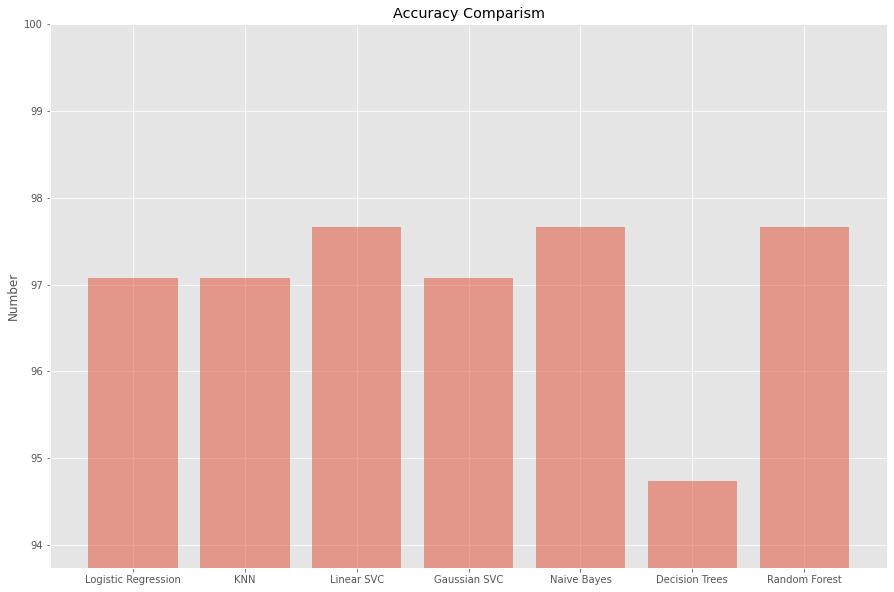

In [52]:
figure = plt.figure(figsize=(15, 10))
accuracy_score = [lr_acc, knn_acc, svcl_acc, svck_acc, nb_acc, dtc_acc, rfc_acc]
for i,j in enumerate(accuracy_score):
    val = j * 100
    accuracy_score[i] = j * 100
objects = ['Logistic Regression',
           'KNN', 
           'Linear SVC', 
           'Gaussian SVC',
           'Naive Bayes',
           'Decision Trees', 
           'Random Forest']
y_pos = np.arange(len(objects))
plt.ylim(min(accuracy_score)-1, 100)
plt.bar(y_pos, accuracy_score ,alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Accuracy Comparism')